In [2]:
%run setup.ipynb

In [3]:
def plot_h12(pop, chromosome, ax=None, markersize=.5, legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 2), facecolor='w')
    palette = sns.color_palette("Blues_d", 3)[::-1]
    windows, gwindows, h1, h12, h123, h2_h1 = load_h12_gwss(pop, chromosome)
    x = windows.mean(axis=1) / 1e6
    ax.plot(x, h123, linestyle=' ', marker='o', color=palette[0], markersize=markersize, label='H123')
    ax.plot(x, h12, linestyle=' ', marker='o', color=palette[1], markersize=markersize, label='H12')
    ax.plot(x, h1, linestyle=' ', marker='o', color=palette[2], markersize=markersize, label='H1')
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.set_xlim(0, chromosome_plen[chromosome] / 1e6)
    ax.set_ylim(0, 1)
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    

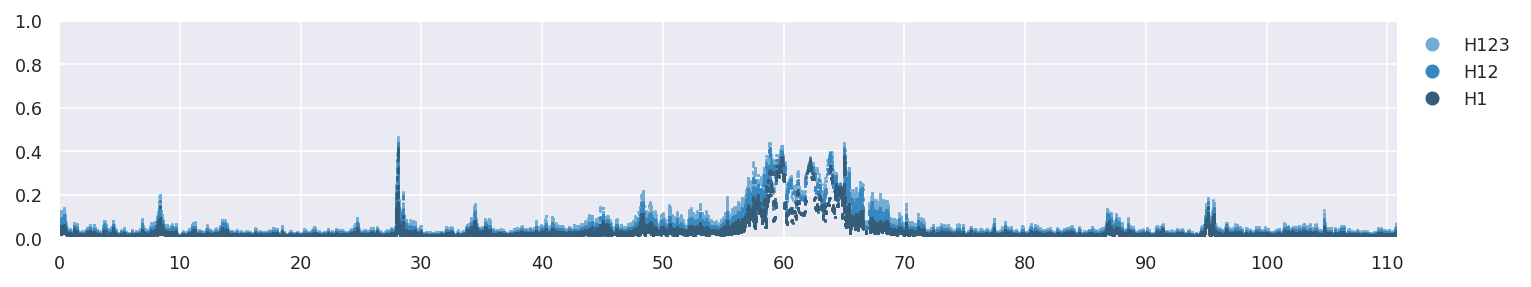

In [4]:
plot_h12('ao_col', '2', legend=True)

In [5]:
def plot_ihs(pop, chromosome, ax=None, markersize=.5, window_size=200, window_step=100, legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 2), facecolor='w')
    palette = sns.color_palette("Reds_d", 4)[::-1]
    x, y_max, y_pc95, y_pc75, y_pc50 = load_ihs_gwss(pop, chromosome, window_size=window_size, window_step=window_step)
    x = x/1e6
    ax.plot(x, y_max.clip(0, 10), marker='o', linestyle=' ', markersize=markersize, color=palette[0], label='$P_{100}$')
    ax.plot(x, y_pc95.clip(0, 10), marker='o', linestyle=' ', markersize=markersize, color=palette[1], label='$P_{95}$')
    ax.plot(x, y_pc75.clip(0, 10), marker='o', linestyle=' ', markersize=markersize, color=palette[2], label='$P_{75}$')
    ax.plot(x, y_pc50.clip(0, 10), marker='o', linestyle=' ', markersize=markersize, color=palette[3], label='$P_{50}$')
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.set_xlim(0, chromosome_plen[chromosome] / 1e6)
    ax.set_ylim(0, 10)
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    

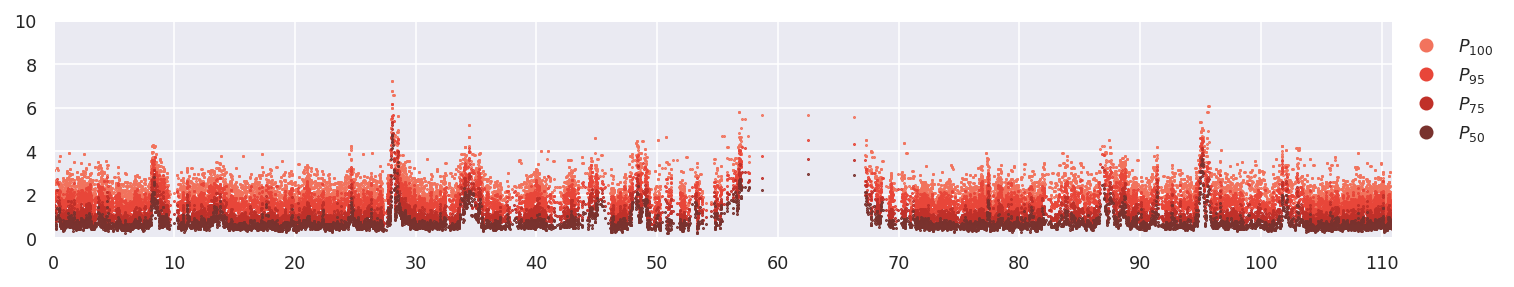

In [6]:
plot_ihs('ao_col', '2', legend=True)

In [7]:
def plot_xpehh(pop1, pop2, chromosome, ax=None, markersize=.5, window_size=500, window_step=250, legend=False, label=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 2), facecolor='w')
    palette = sns.color_palette("Greens_d", 4)[::-1]
    x, y_max, y_pc95, y_pc75, y_pc50 = load_xpehh_gwss(pop1, pop2, chromosome, window_size=window_size, window_step=window_step)
    x = x/1e6
    ax.plot(x, y_max.clip(0, 6), marker='o', linestyle=' ', markersize=markersize, color=palette[0], label='$P_{100}$')
    ax.plot(x, y_pc95.clip(0, 6), marker='o', linestyle=' ', markersize=markersize, color=palette[1], label='$P_{95}$')
    ax.plot(x, y_pc75.clip(0, 6), marker='o', linestyle=' ', markersize=markersize, color=palette[2], label='$P_{75}$')
    ax.plot(x, y_pc50.clip(0, 6), marker='o', linestyle=' ', markersize=markersize, color=palette[3], label='$P_{50}$')
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.set_xlim(0, chromosome_plen[chromosome] / 1e6)
    ax.set_ylim(0, 6)
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    if label:
        pop2_label = (
            pop_defs[pop2]["label"]
            .replace("An. gambiae", "$An. gambiae$")
            .replace("An. coluzzii", "$An. coluzzii$")
        )
        ax.annotate(f'vs. {pop2_label}', xy=(0, 6), xytext=(2, -2), textcoords='offset points', fontsize=7, va='top', ha='left')
    

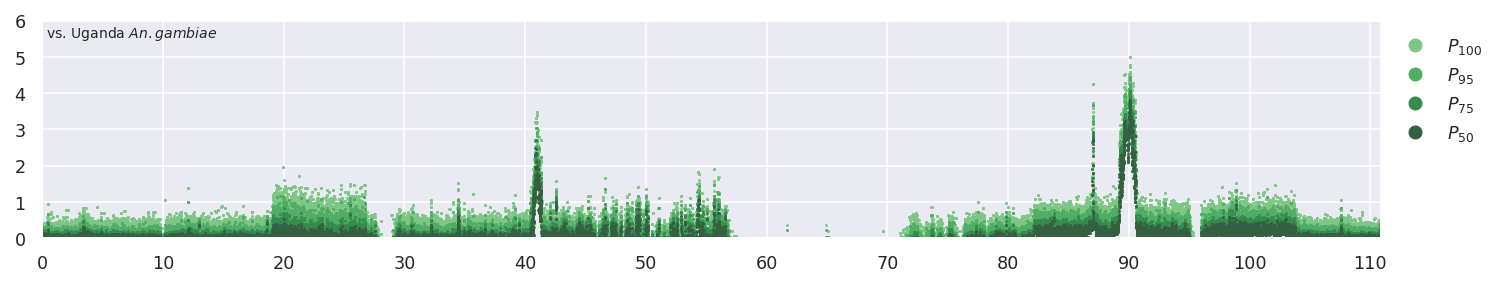

In [8]:
plot_xpehh('bf_gam', 'ug_gam', '2', legend=True, label=True)

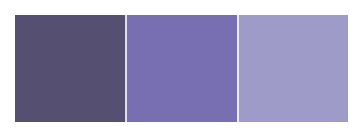

In [11]:
sns.palplot(sns.color_palette('Purples_d', 3))

In [12]:
def plot_pbs(pop1, pop2, pop3, chromosome, ax=None, markersize=.5, window_size=500, window_step=250, label=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 2), facecolor='w')
    windows, gwindows, pbs, pbs_scaled = load_pbs_gwss(
        pop1, pop2, pop3, chromosome, window_size=window_size, window_step=window_step
    )
    x = windows.mean(axis=1)/1e6
    palette = sns.color_palette('Purples_d', 3)
    ax.plot(x, pbs_scaled.clip(0, 50), marker='o', linestyle=' ', markersize=markersize, 
            color=palette[1])
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.set_xlim(0, chromosome_plen[chromosome] / 1e6)
    ax.set_ylim(0, 50)
    if label:
        pop2_label = pop_defs[pop2]["label"]
        pop3_label = pop_defs[pop3]["label"]
        annotation = (
            f'vs. {pop2_label}, {pop3_label}'
            .replace("An. gambiae", "$An. gambiae$")
            .replace("An. coluzzii", "$An. coluzzii$")
        )
        ax.annotate(annotation, xy=(0, 50), xytext=(2, -2), textcoords='offset points', fontsize=7, va='top', ha='left')
    

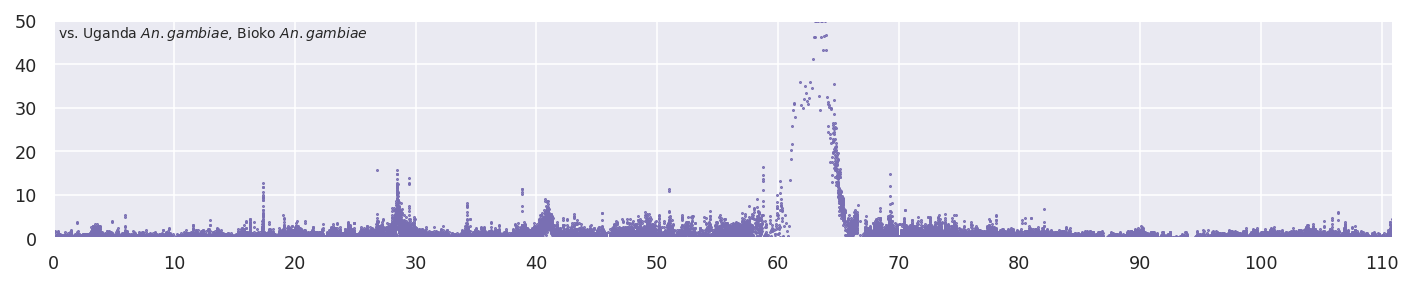

In [13]:
plot_pbs('bf_gam', 'ug_gam', 'gq_gam', '2', label=True)

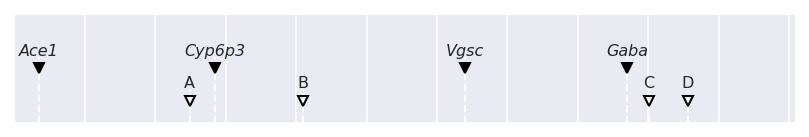

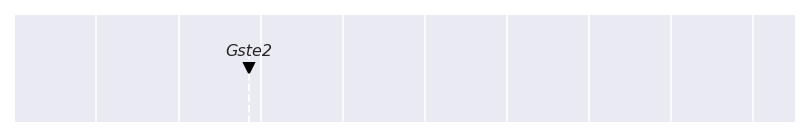

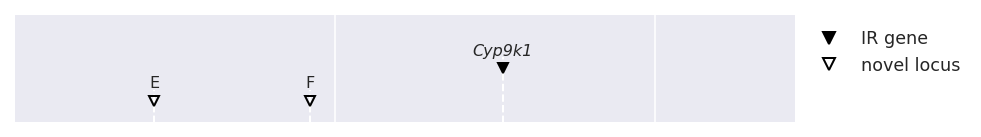

In [14]:
def guide_loci(chromosome, ax, genes_ymax=1, novel_loci_ymax=1):
    for gene in ir_genes:
        if gene.chromosome == chromosome:
            x = (gene.chromosome_start + gene.chromosome_end) / 2e6
            ax.axvline(x, ymin=0, ymax=genes_ymax, color='w', linestyle='--', linewidth=1)
    for locus_label, (locus_chromosome, locus_pos) in novel_loci.items():
        if locus_chromosome == chromosome:
            x = locus_pos / 1e6
            ax.axvline(x, ymin=0, ymax=novel_loci_ymax, color='w', linestyle='--', linewidth=1)
    
    
def plot_loci(chromosome, ax=None, legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 1), facecolor='w')
    guide_loci(chromosome, ax=ax, genes_ymax=.6, novel_loci_ymax=.3)
    for gene in ir_genes:
        if gene.chromosome == chromosome:
            x = (gene.chromosome_start + gene.chromosome_end) / 2e6
            y = .5
            ax.plot([x], [y], marker='v', linestyle=' ', color='k')
            ax.annotate(gene['Name'], xy=(x, y), xytext=(0, 5), textcoords='offset points', 
                        fontstyle='italic', ha='center', va='bottom', fontsize=8)
    for locus_label, (locus_chromosome, locus_pos) in novel_loci.items():
        if locus_chromosome == chromosome:
            x = locus_pos / 1e6
            y = .2
            ax.plot([x], [y], marker='v', linestyle=' ', mec='k', mfc='none')
            ax.annotate(locus_label, xy=(x, y), xytext=(0, 5), textcoords='offset points', 
                        ha='center', va='bottom', fontsize=8)
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(0, chromosome_plen[chromosome]/1e6)
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    if legend:
        from matplotlib.lines import Line2D
        gene_marker = Line2D([], [], linestyle=' ', marker='v', color='k', label='IR gene',
                             markersize=6)
        novel_locus_marker = Line2D([], [], linestyle=' ', marker='v', mfc='none', 
                                    mec='k', label='novel locus', markersize=6)
        ax.legend(handles=[gene_marker, novel_locus_marker], bbox_to_anchor=(1, 1), 
                  loc='upper left', facecolor='w', edgecolor='w')
    
    
plot_loci('2')
plot_loci('3')
plot_loci('X', legend=True)

In [15]:
def fig_gwss(pop, xpehh_pop, pbs_pops, markersize=.5, figsize=(12, 7), savefig=True, savefig_dpi=150):
    
    fig = plt.figure(figsize=figsize, facecolor='w')
    width_ratios = [chromosome_plen[c] for c in chromosomes]
    gs = fig.add_gridspec(ncols=3, nrows=5, width_ratios=width_ratios, height_ratios=[1.5, 3, 3, 3, 3])
    
    # Loci
    
    ax = fig.add_subplot(gs[0, 0])
    plot_loci(chromosome='2', ax=ax)
    ax.set_title('Chromosome 2')
    
    ax = fig.add_subplot(gs[0, 1])
    plot_loci(chromosome='3', ax=ax)
    ax.set_title('Chromosome 3')
    
    ax = fig.add_subplot(gs[0, 2])
    plot_loci(chromosome='X', ax=ax, legend=True)
    ax.set_title('Chromosome X')
    
    # H12
    
    ax = fig.add_subplot(gs[1, 0])
    guide_loci('2', ax=ax)
    plot_h12(pop, chromosome='2', ax=ax, markersize=markersize)
    ax.set_ylabel('$H12$')
    ax.set_xticklabels([])

    ax = fig.add_subplot(gs[1, 1])
    guide_loci('3', ax=ax)
    plot_h12(pop, chromosome='3', ax=ax, markersize=markersize)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)

    ax = fig.add_subplot(gs[1, 2])
    guide_loci('X', ax=ax)
    plot_h12(pop, chromosome='X', ax=ax, markersize=markersize, legend=True)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    
    # iHS
    
    ax = fig.add_subplot(gs[2, 0])
    guide_loci('2', ax=ax)
    plot_ihs(pop, chromosome='2', ax=ax, markersize=markersize)
    ax.set_ylabel('$|iHS|$')
    ax.set_xticklabels([])
    
    ax = fig.add_subplot(gs[2, 1])
    guide_loci('3', ax=ax)
    plot_ihs(pop, chromosome='3', ax=ax, markersize=markersize)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    ax = fig.add_subplot(gs[2, 2])
    guide_loci('X', ax=ax)
    plot_ihs(pop, chromosome='X', ax=ax, markersize=markersize, legend=True)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    # XPEHH

    ax = fig.add_subplot(gs[3, 0])
    guide_loci('2', ax=ax)
    plot_xpehh(pop, xpehh_pop, chromosome='2', ax=ax, markersize=markersize, label=True)
    ax.set_ylabel('$XP-EHH$')
    ax.set_xticklabels([])
    
    ax = fig.add_subplot(gs[3, 1])
    guide_loci('3', ax=ax)
    plot_xpehh(pop, xpehh_pop, chromosome='3', ax=ax, markersize=markersize)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    ax = fig.add_subplot(gs[3, 2])
    guide_loci('X', ax=ax)
    plot_xpehh(pop, xpehh_pop, chromosome='X', ax=ax, markersize=markersize, legend=True)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    # PBS
    pop2, pop3 = pbs_pops

    ax = fig.add_subplot(gs[4, 0])
    guide_loci('2', ax=ax)
    plot_pbs(pop, pop2, pop3, chromosome='2', ax=ax, markersize=markersize, label=True)
    ax.set_ylabel('$PBS$')
    ax.set_xlabel(f'Position (Mbp)')
    
    ax = fig.add_subplot(gs[4, 1])
    guide_loci('3', ax=ax)
    plot_pbs(pop, pop2, pop3, chromosome='3', ax=ax, markersize=markersize)
    ax.set_xlabel(f'Position (Mbp)')
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    ax = fig.add_subplot(gs[4, 2])
    guide_loci('X', ax=ax)
    plot_pbs(pop, pop2, pop3, chromosome='X', ax=ax, markersize=markersize)
    ax.set_xlabel(f'Position (Mbp)')
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    
    pop_label = (
        pop_defs[pop]["label"]
        .replace('An. gambiae', '$An. gambiae$')
        .replace('An. coluzzii', '$An. coluzzii$')
    )
    fig.suptitle(pop_label, y=.96)
    fig.tight_layout()
    
    if savefig:
        pbs_pop2, pbs_pop3 = pbs_pops
        file_path = here() / f'artwork/gwss_{pop}_{xpehh_pop}_{pbs_pop2}_{pbs_pop3}.png'
        fig.savefig(file_path, bbox_inches='tight', dpi=savefig_dpi)


In [16]:
list(pop_defs)

['ao_col',
 'bf_col',
 'bf_gam',
 'ci_col',
 'cm_sav_gam',
 'fr_gam',
 'ga_gam',
 'gh_col',
 'gh_gam',
 'gm',
 'gn_gam',
 'gq_gam',
 'gw',
 'ke',
 'ug_gam']

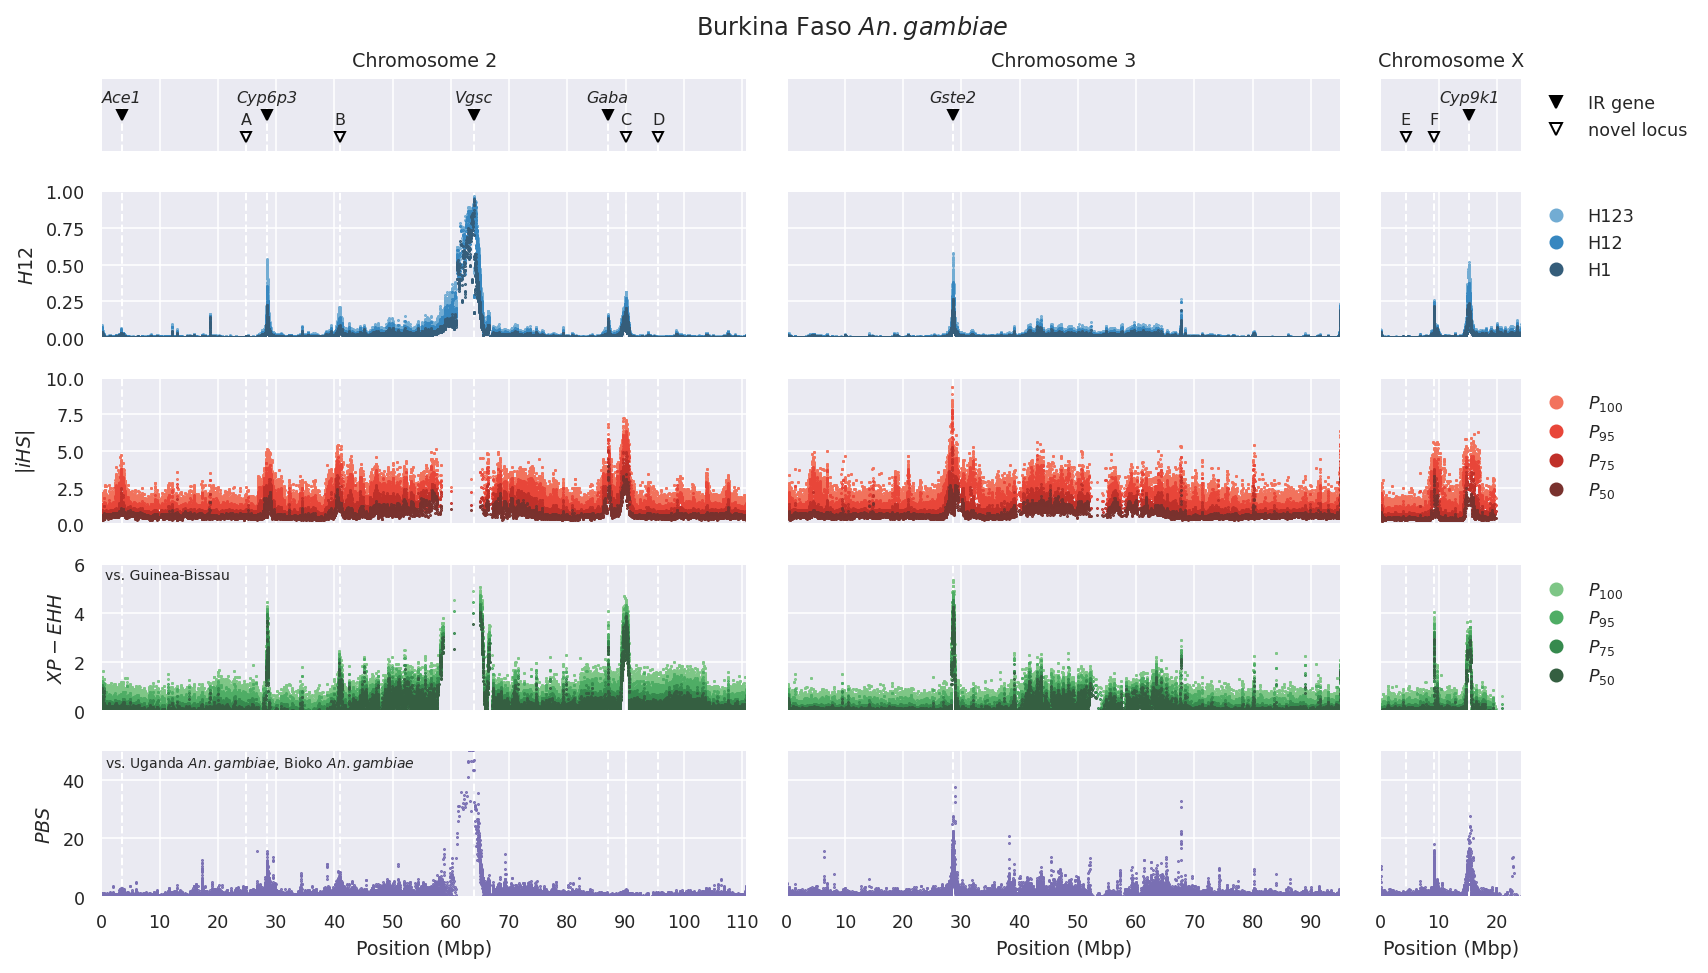

In [17]:
fig_gwss('bf_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

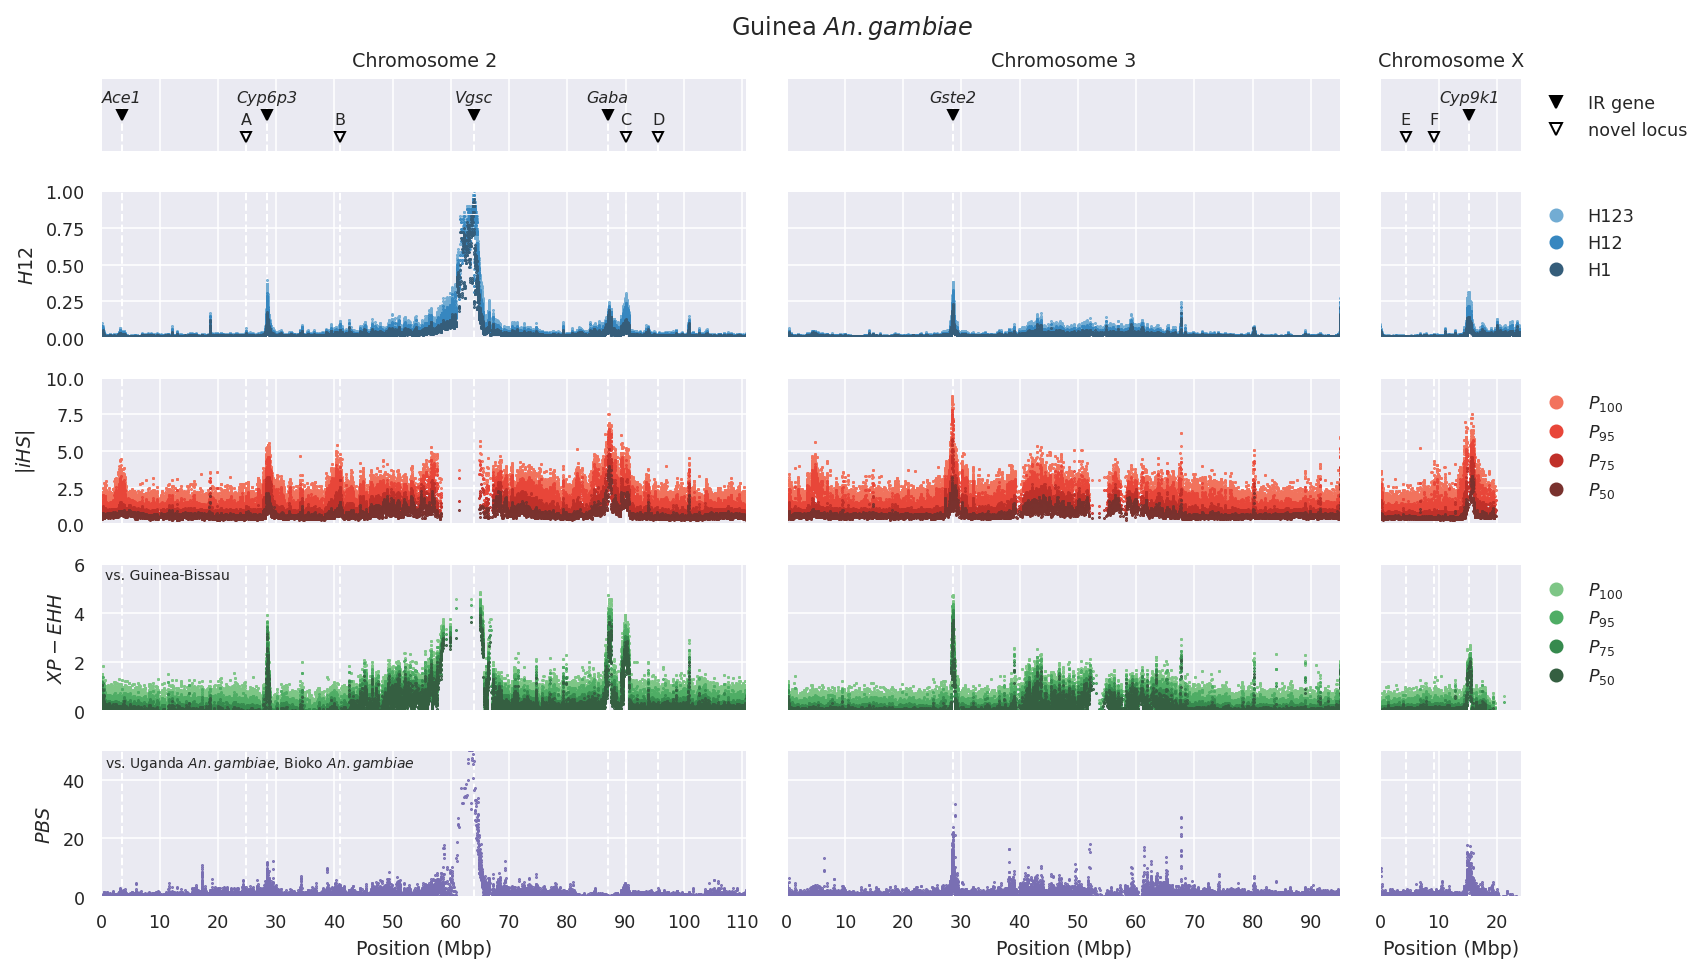

In [18]:
fig_gwss('gn_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

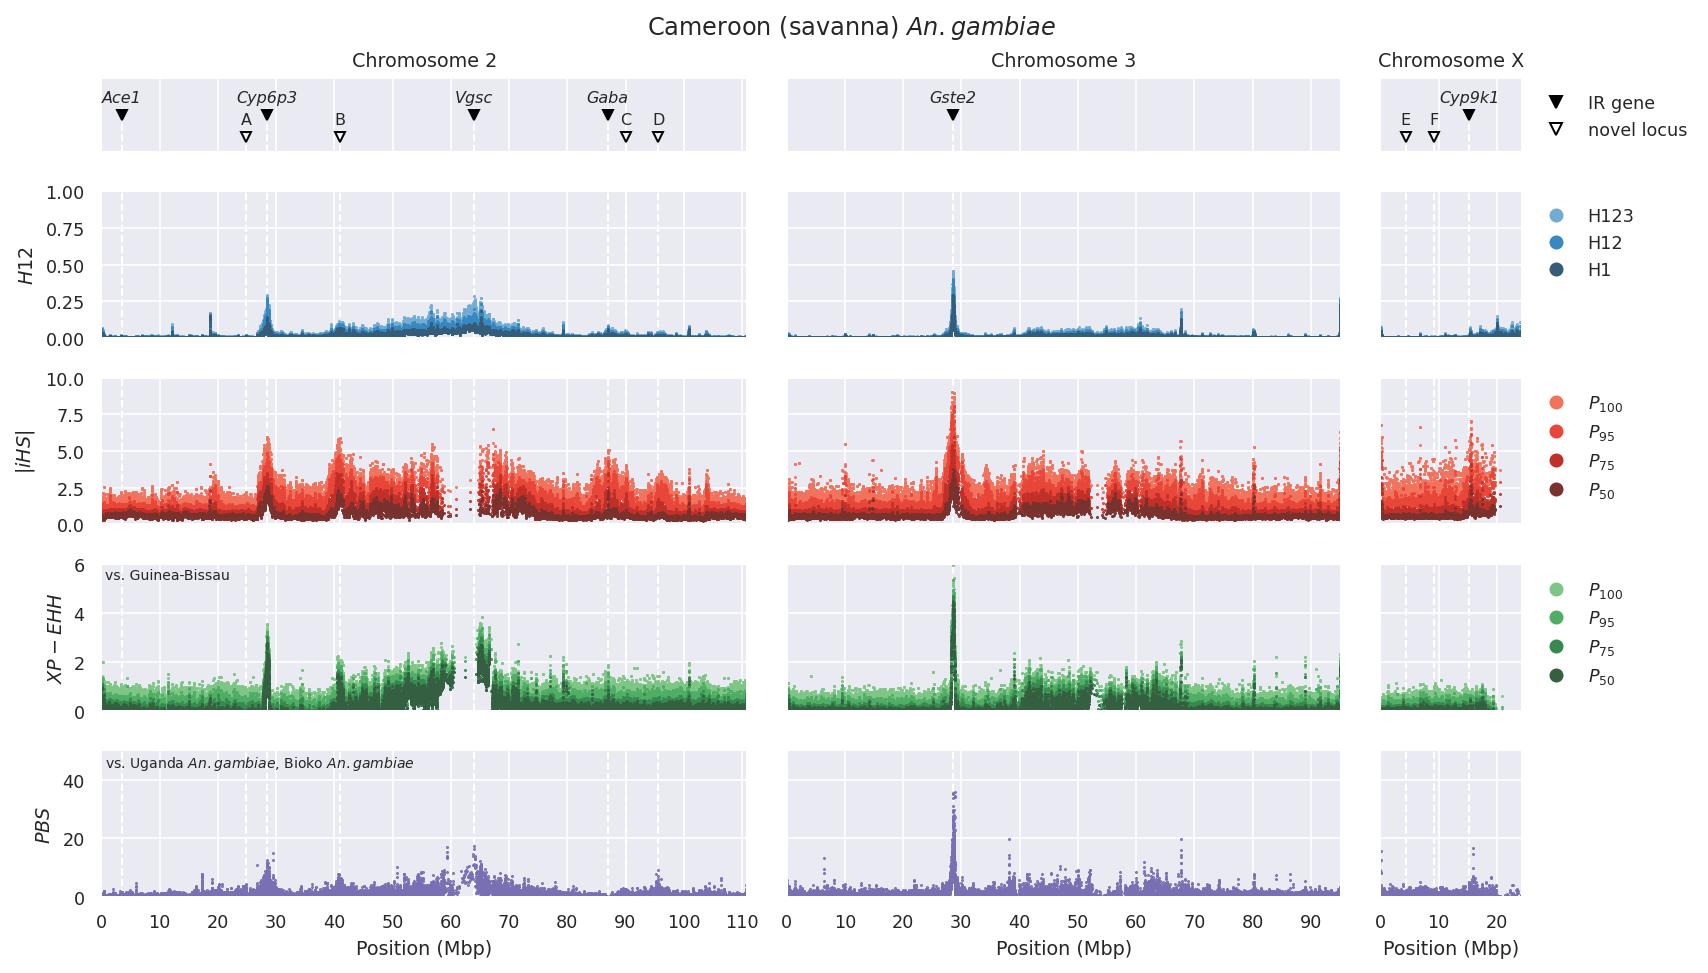

In [19]:
fig_gwss('cm_sav_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

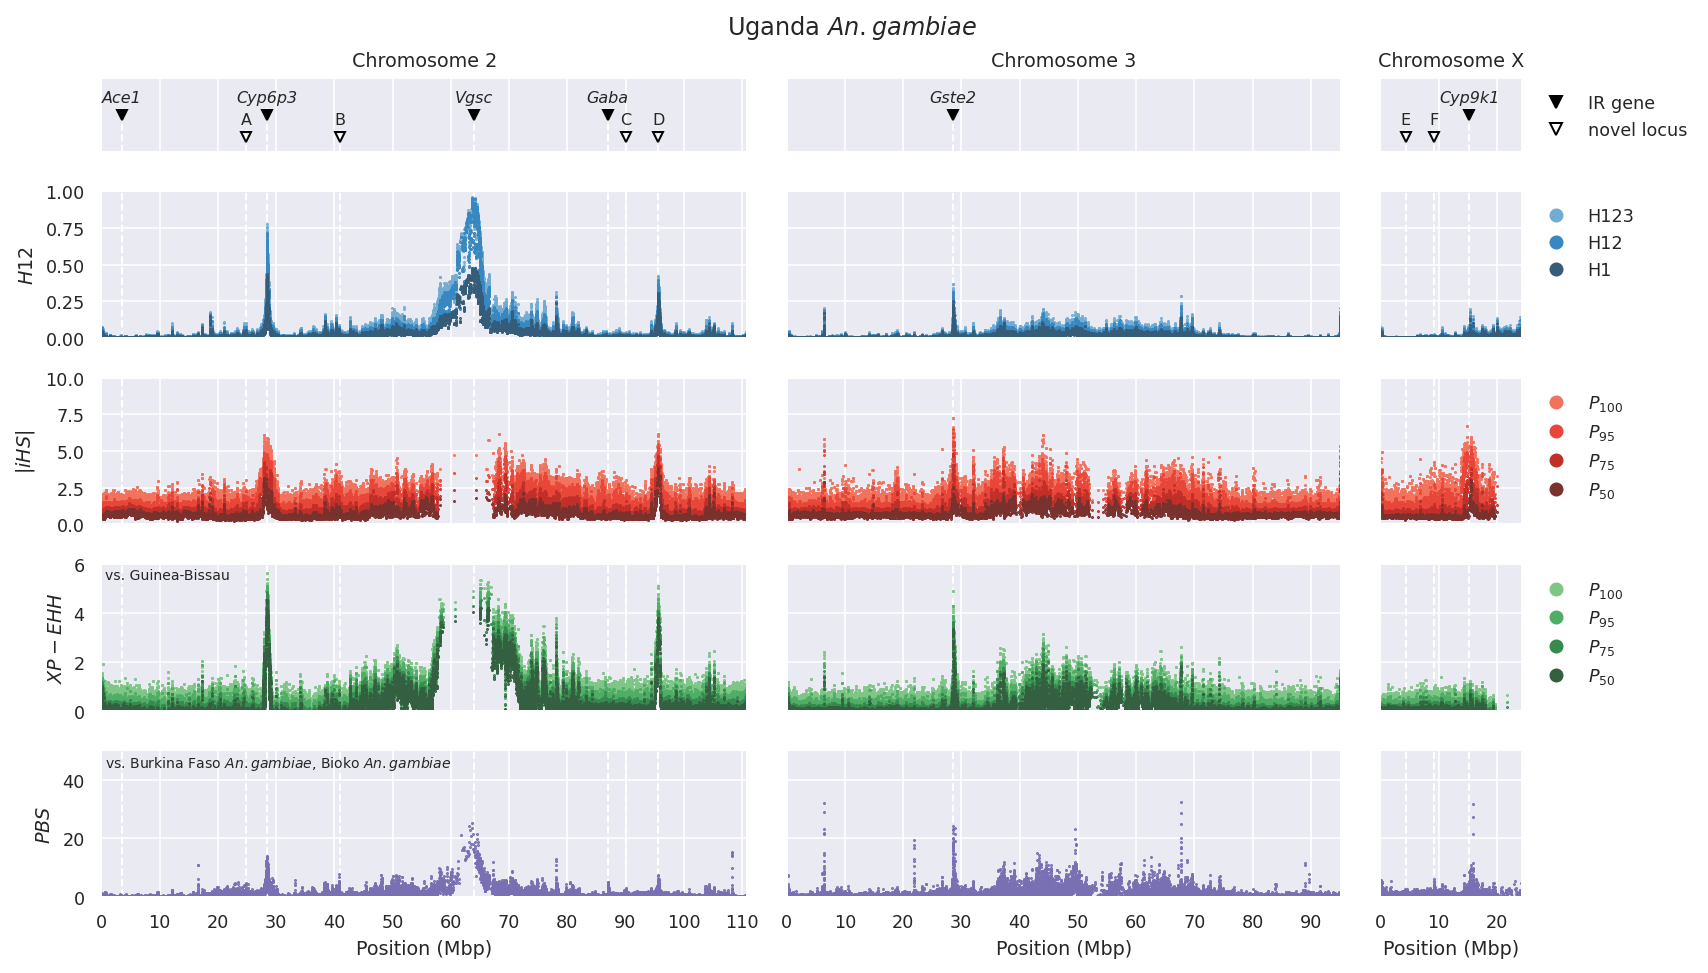

In [20]:
fig_gwss('ug_gam', xpehh_pop='gw', pbs_pops=('bf_gam', 'gq_gam'))

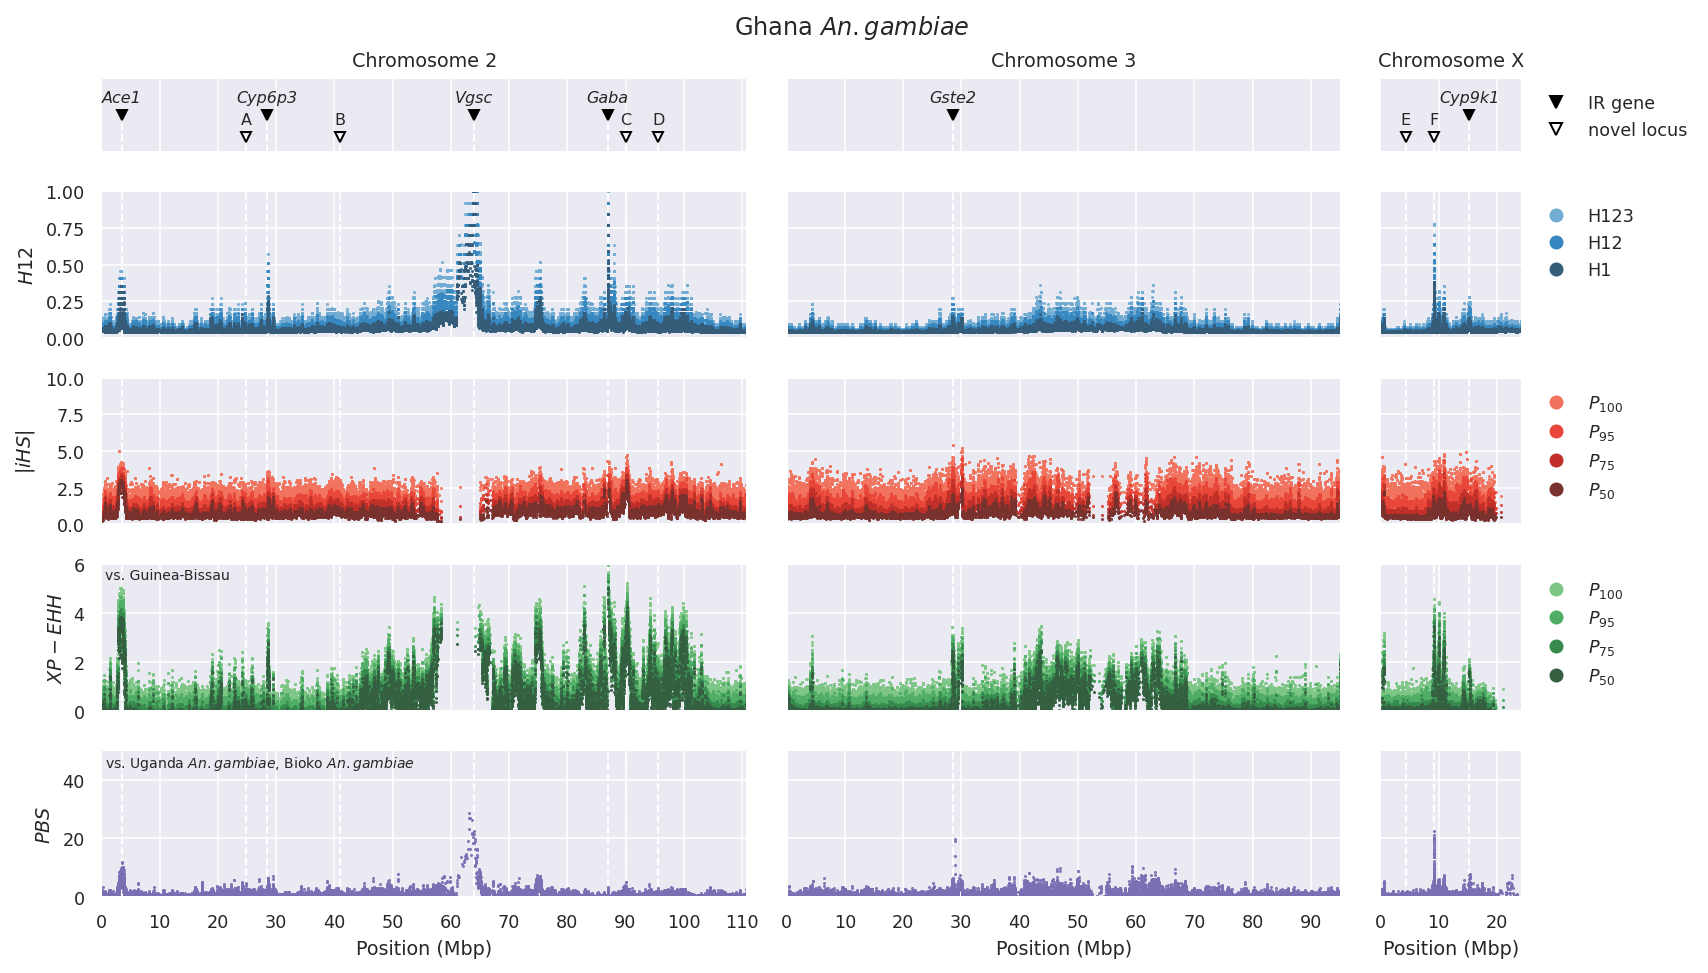

In [21]:
fig_gwss('gh_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

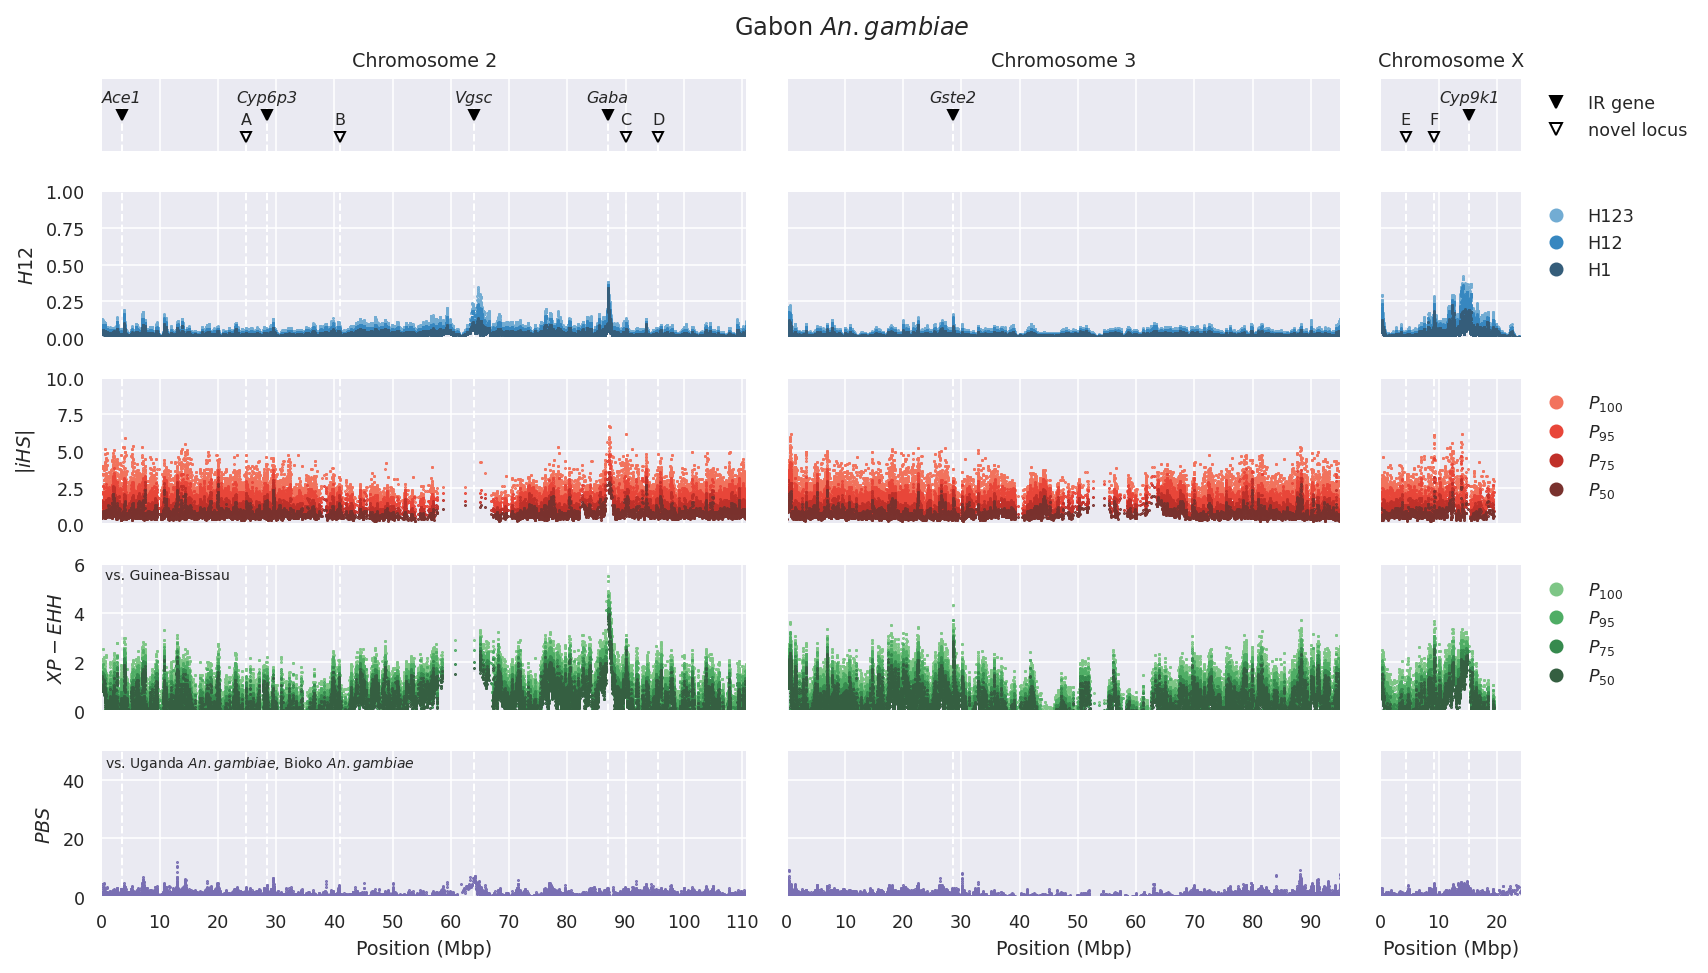

In [22]:
fig_gwss('ga_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

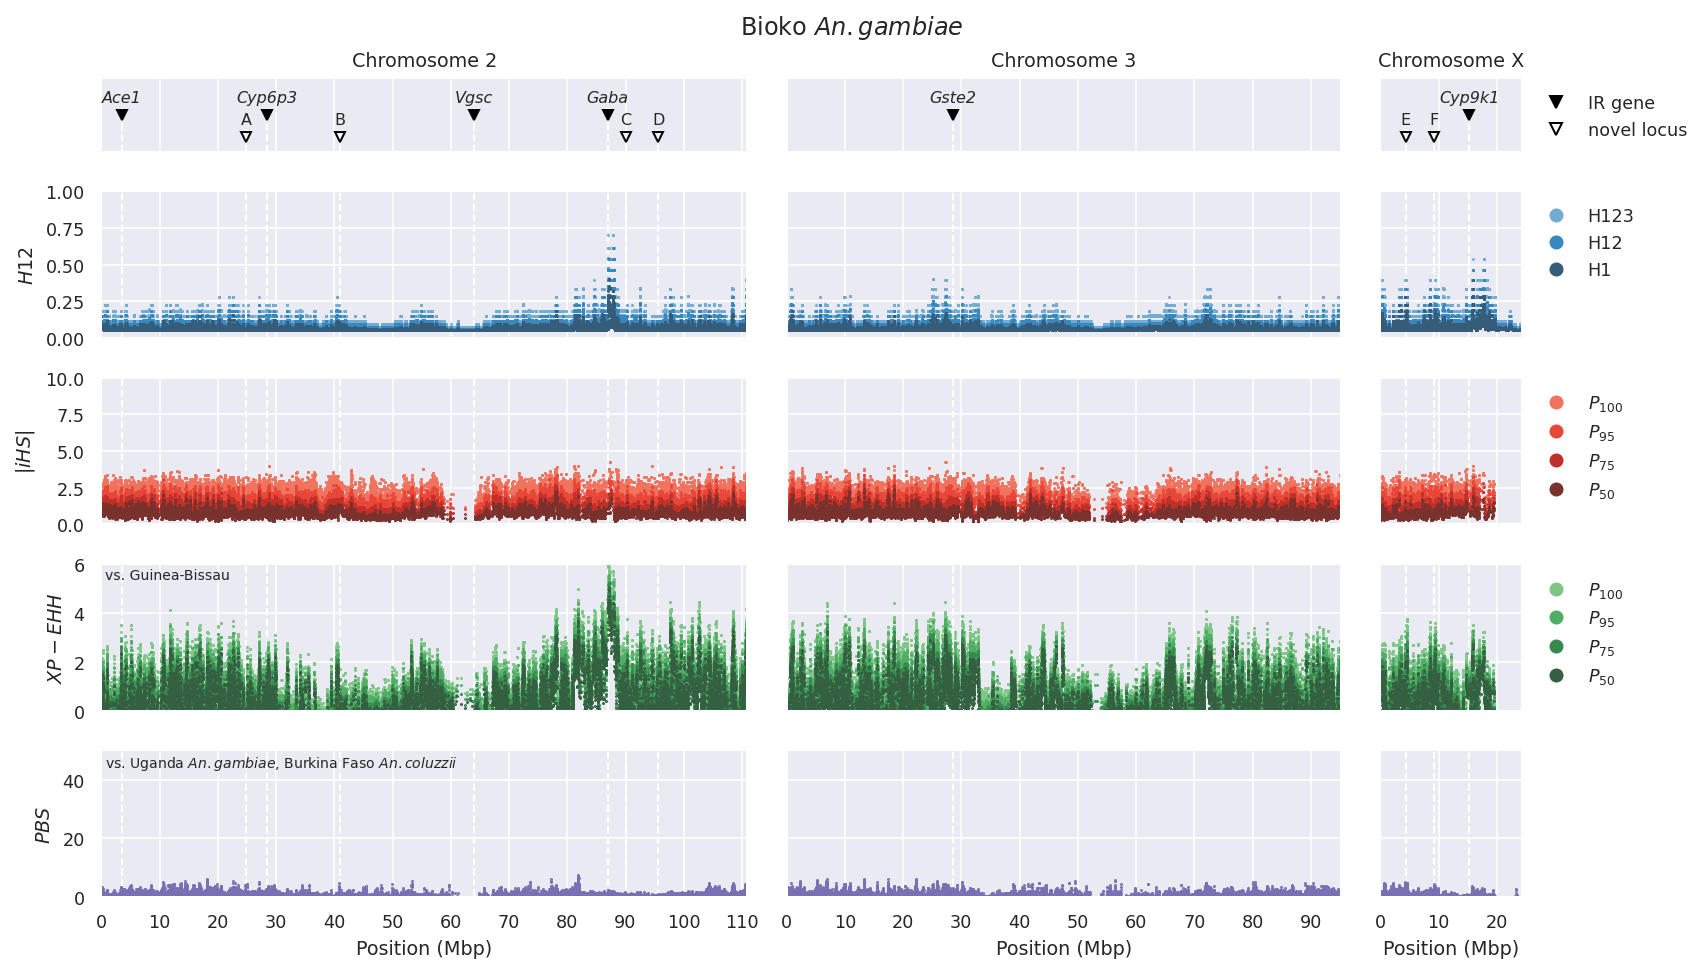

In [23]:
fig_gwss('gq_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'bf_col'))

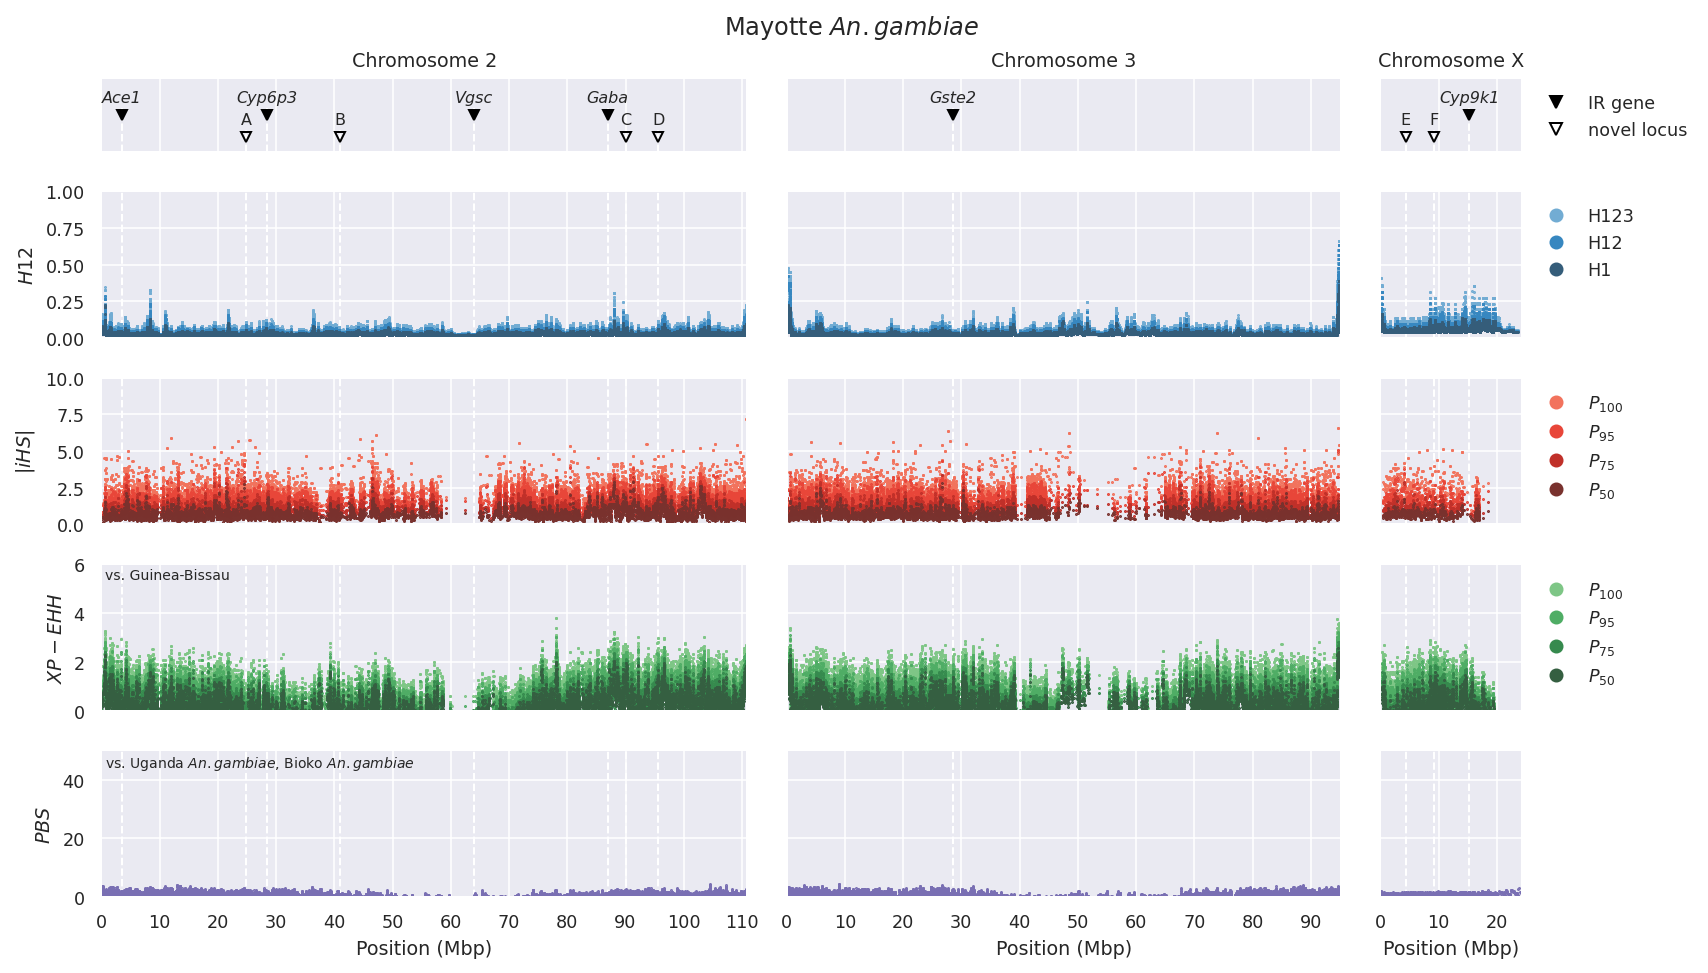

In [24]:
fig_gwss('fr_gam', xpehh_pop='gw', pbs_pops=('ug_gam', 'gq_gam'))

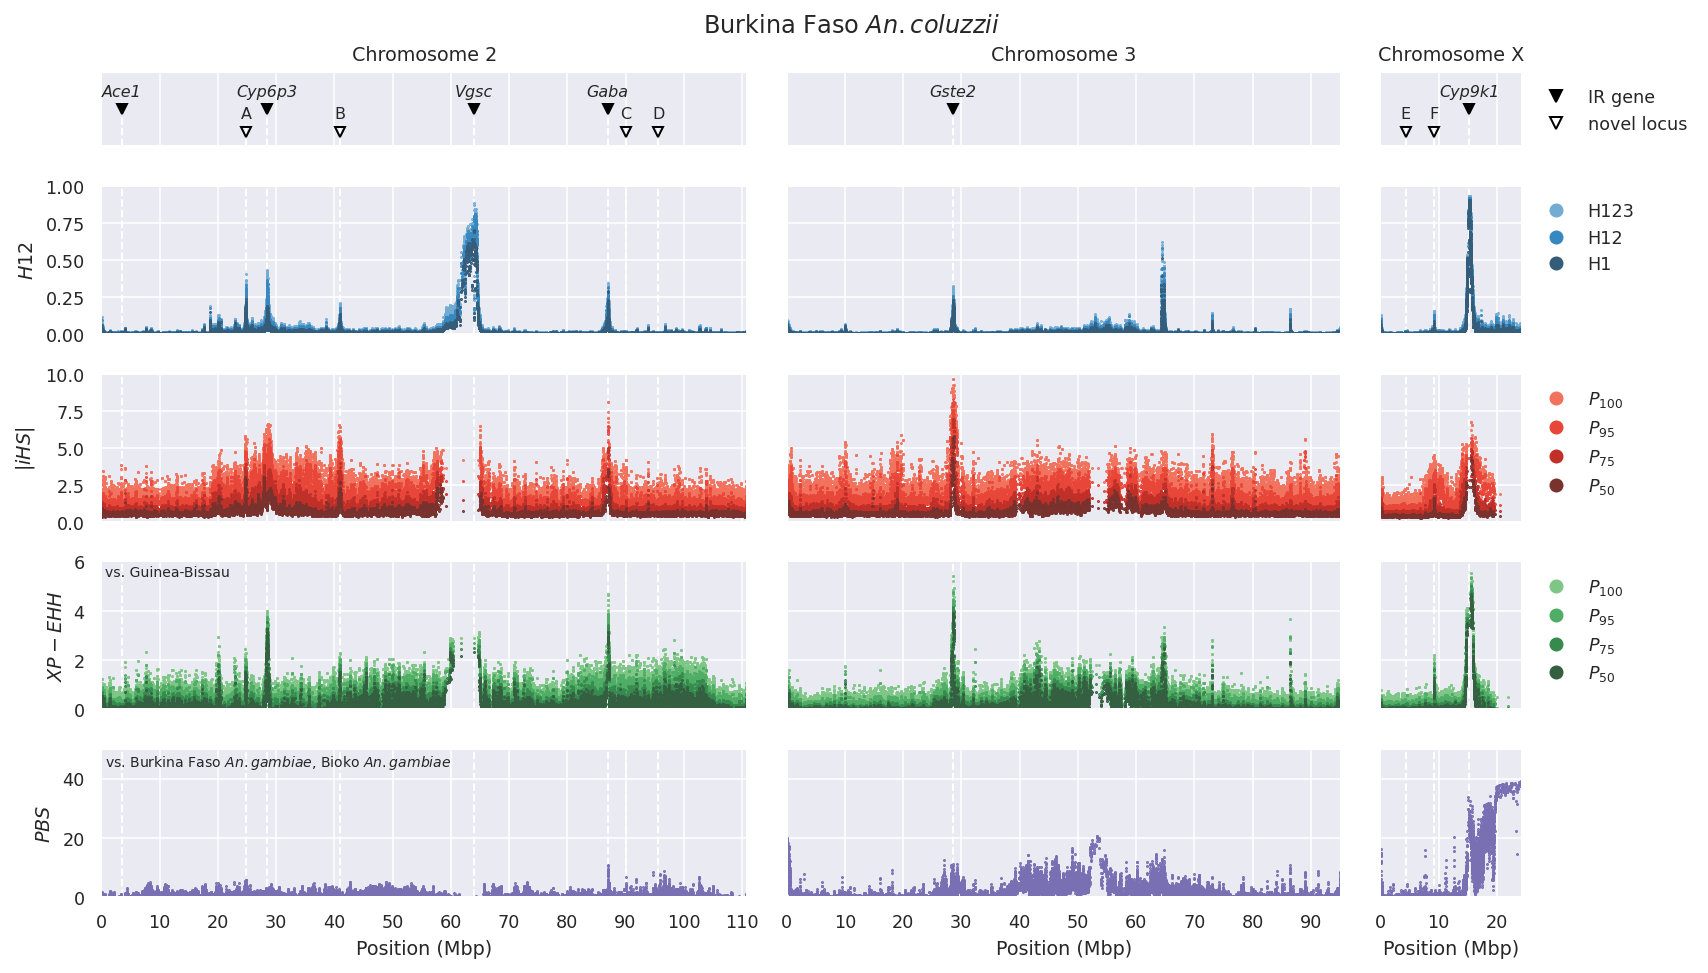

In [25]:
fig_gwss('bf_col', xpehh_pop='gw', pbs_pops=('bf_gam', 'gq_gam'))

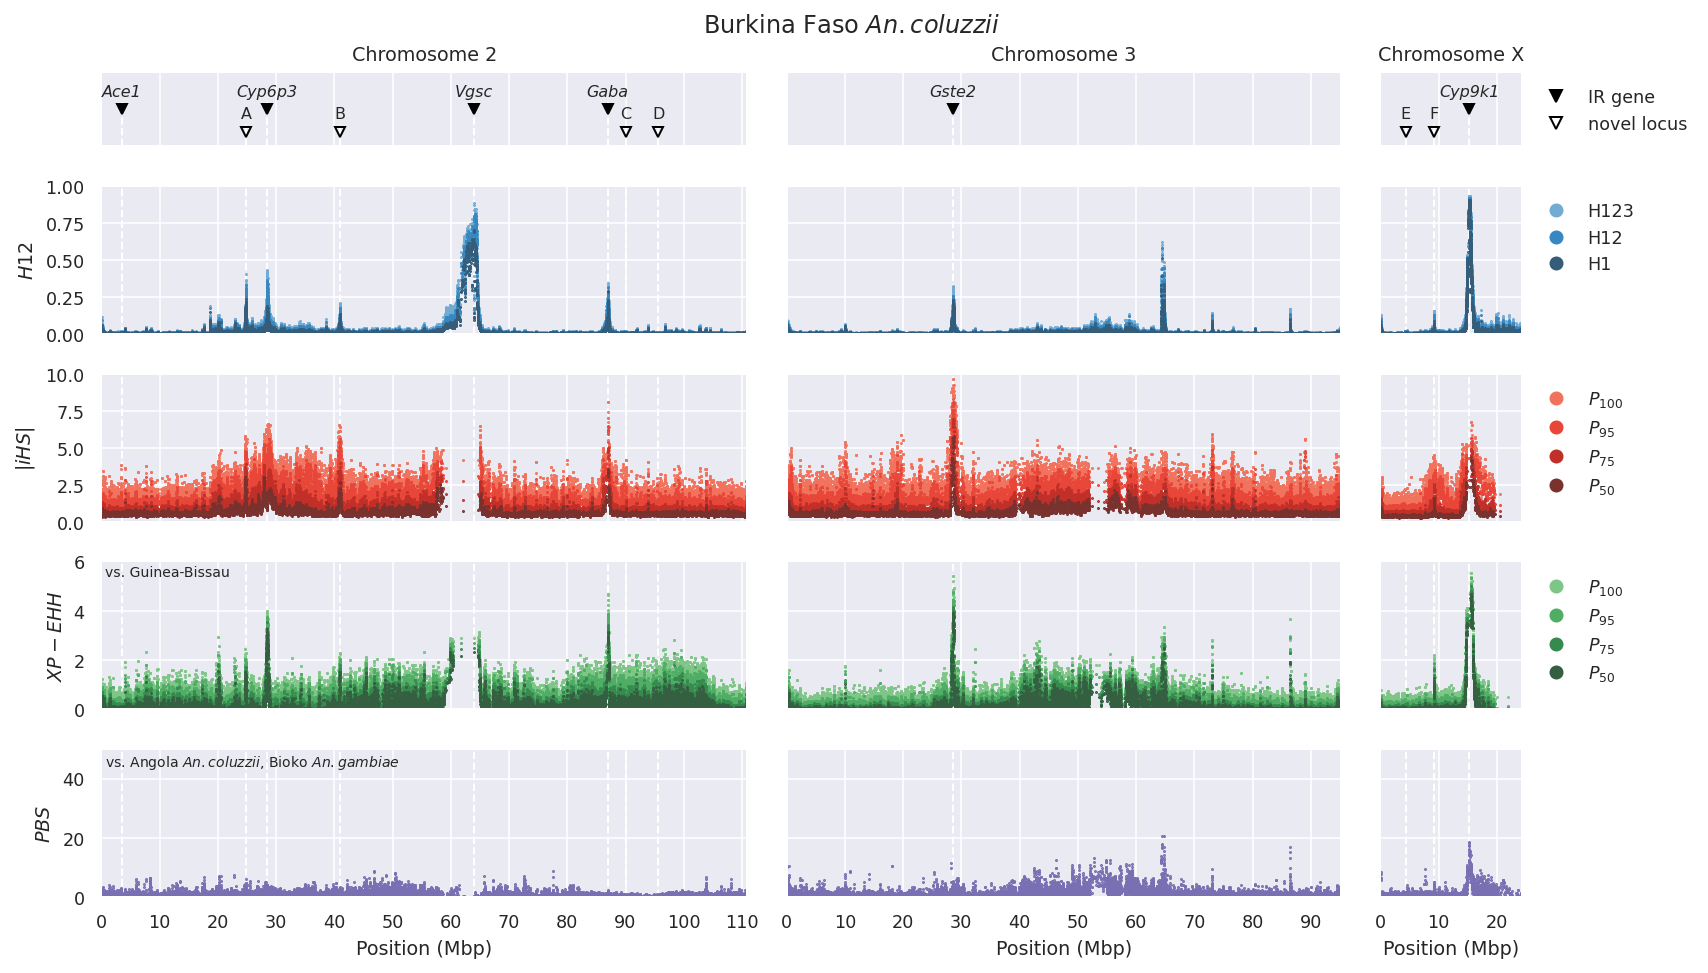

In [26]:
fig_gwss('bf_col', xpehh_pop='gw', pbs_pops=('ao_col', 'gq_gam'))

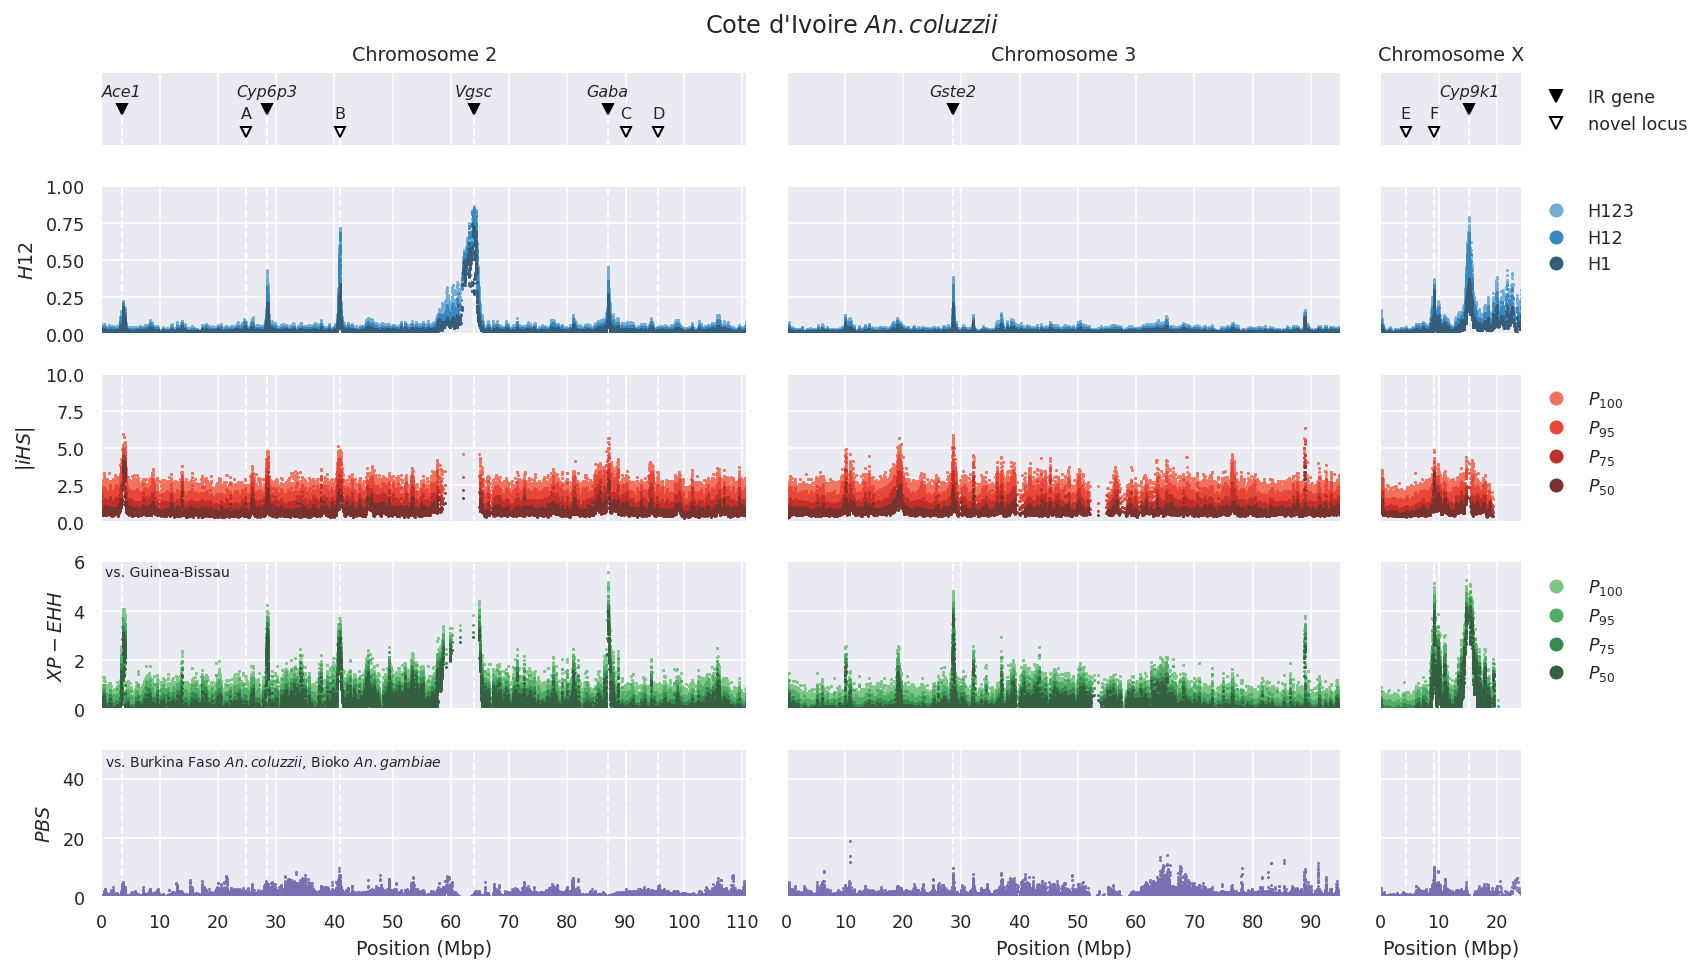

In [27]:
fig_gwss('ci_col', xpehh_pop='gw', pbs_pops=('bf_col', 'gq_gam'))

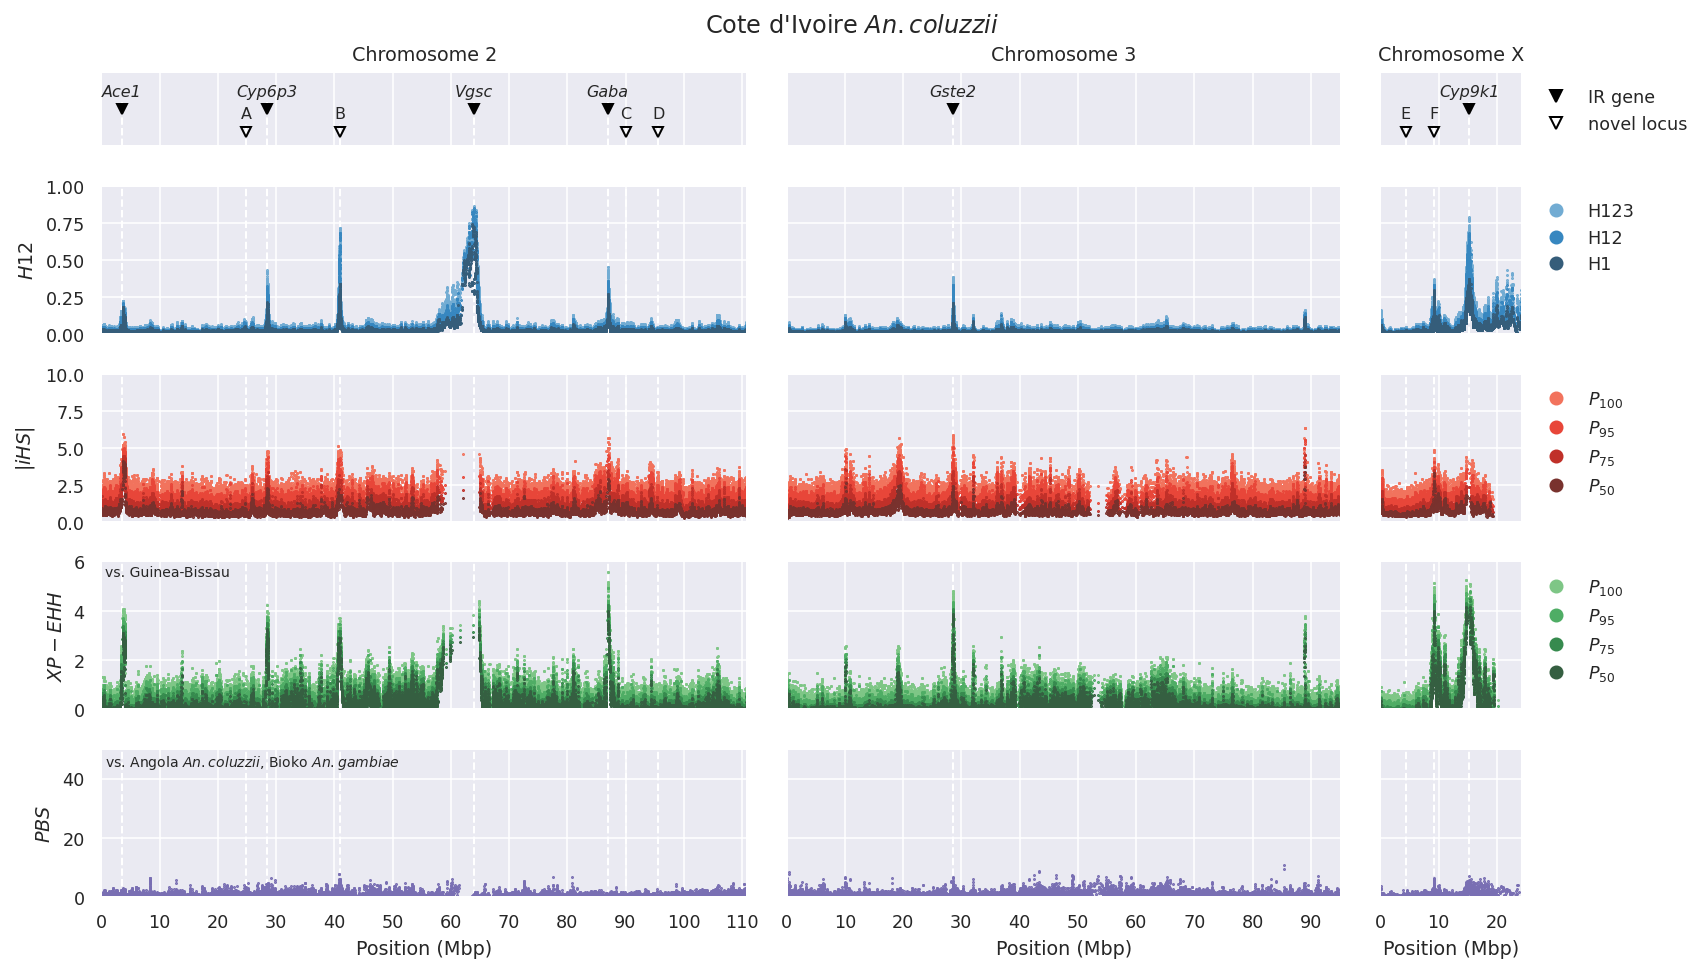

In [28]:
fig_gwss('ci_col', xpehh_pop='gw', pbs_pops=('ao_col', 'gq_gam'))

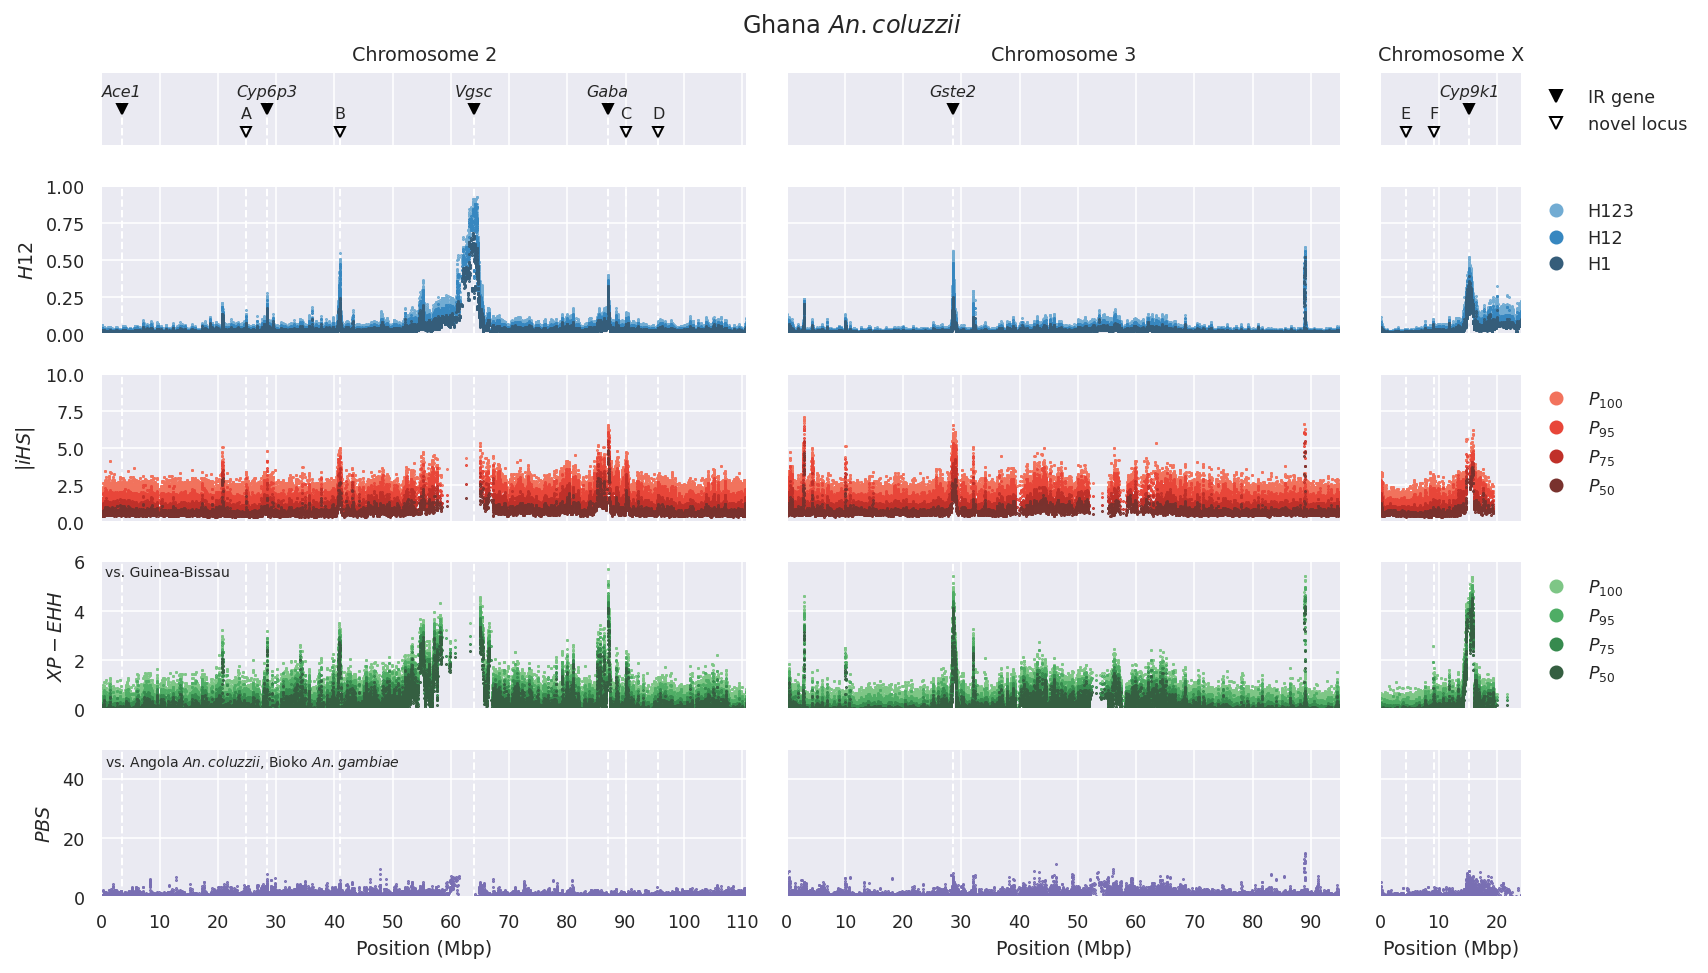

In [29]:
fig_gwss('gh_col', xpehh_pop='gw', pbs_pops=('ao_col', 'gq_gam'))

In [30]:
# TODO novel locus 3:89?

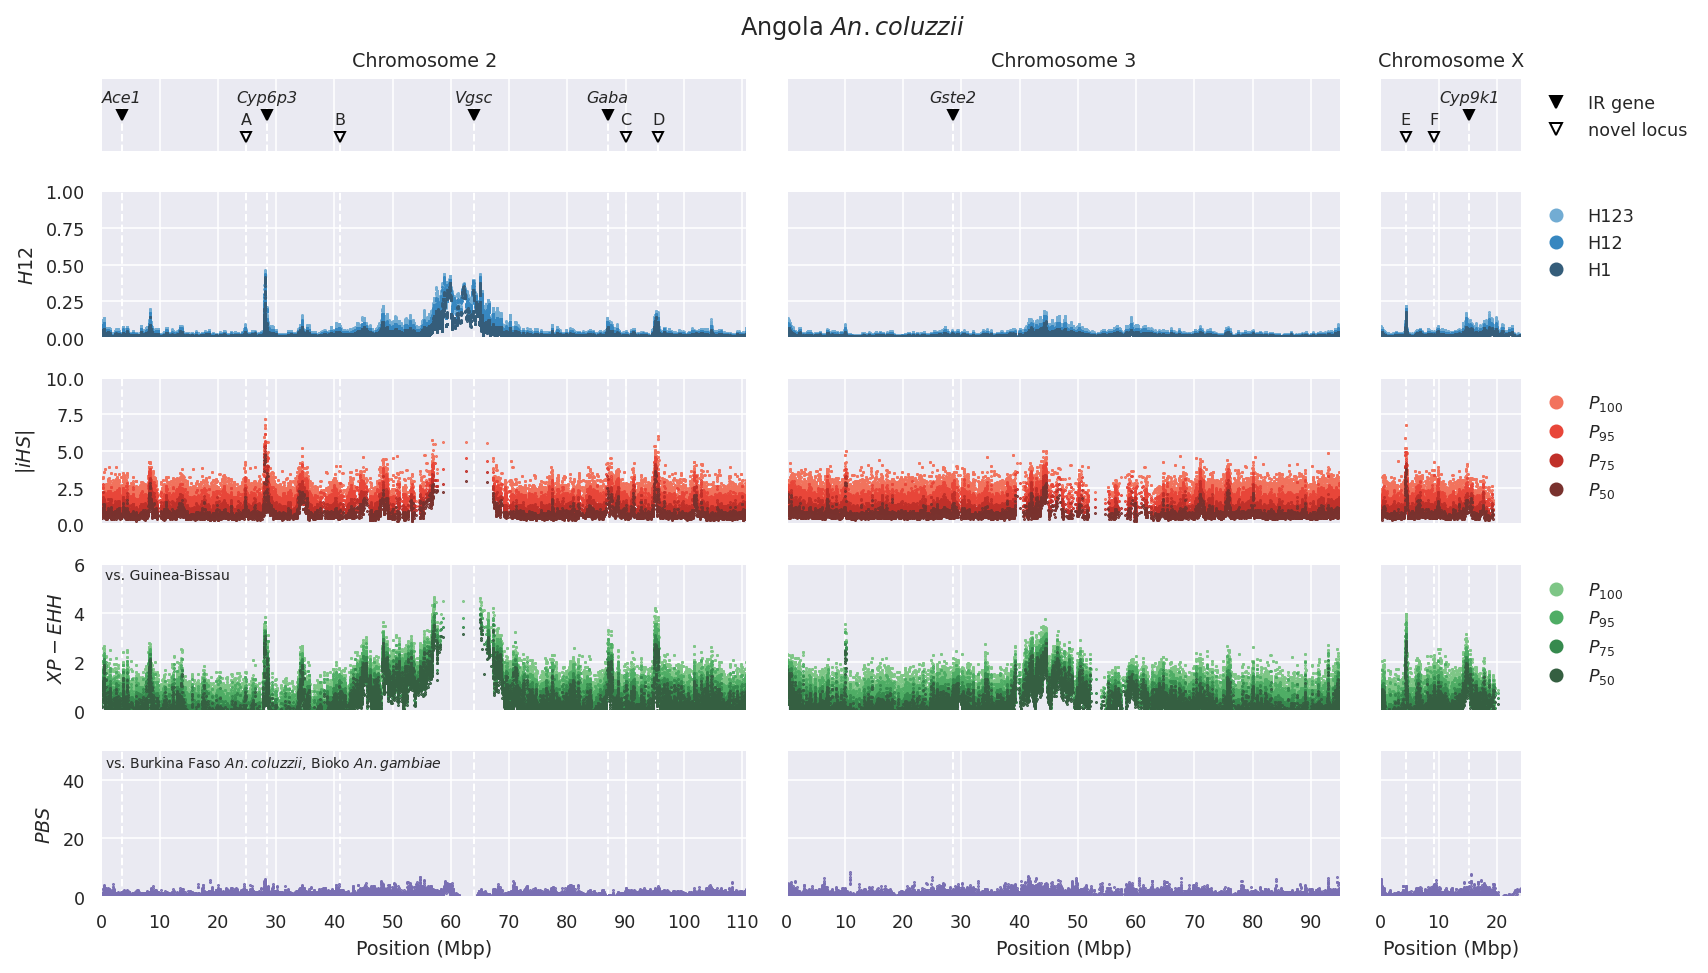

In [31]:
fig_gwss('ao_col', xpehh_pop='gw', pbs_pops=('bf_col', 'gq_gam'))

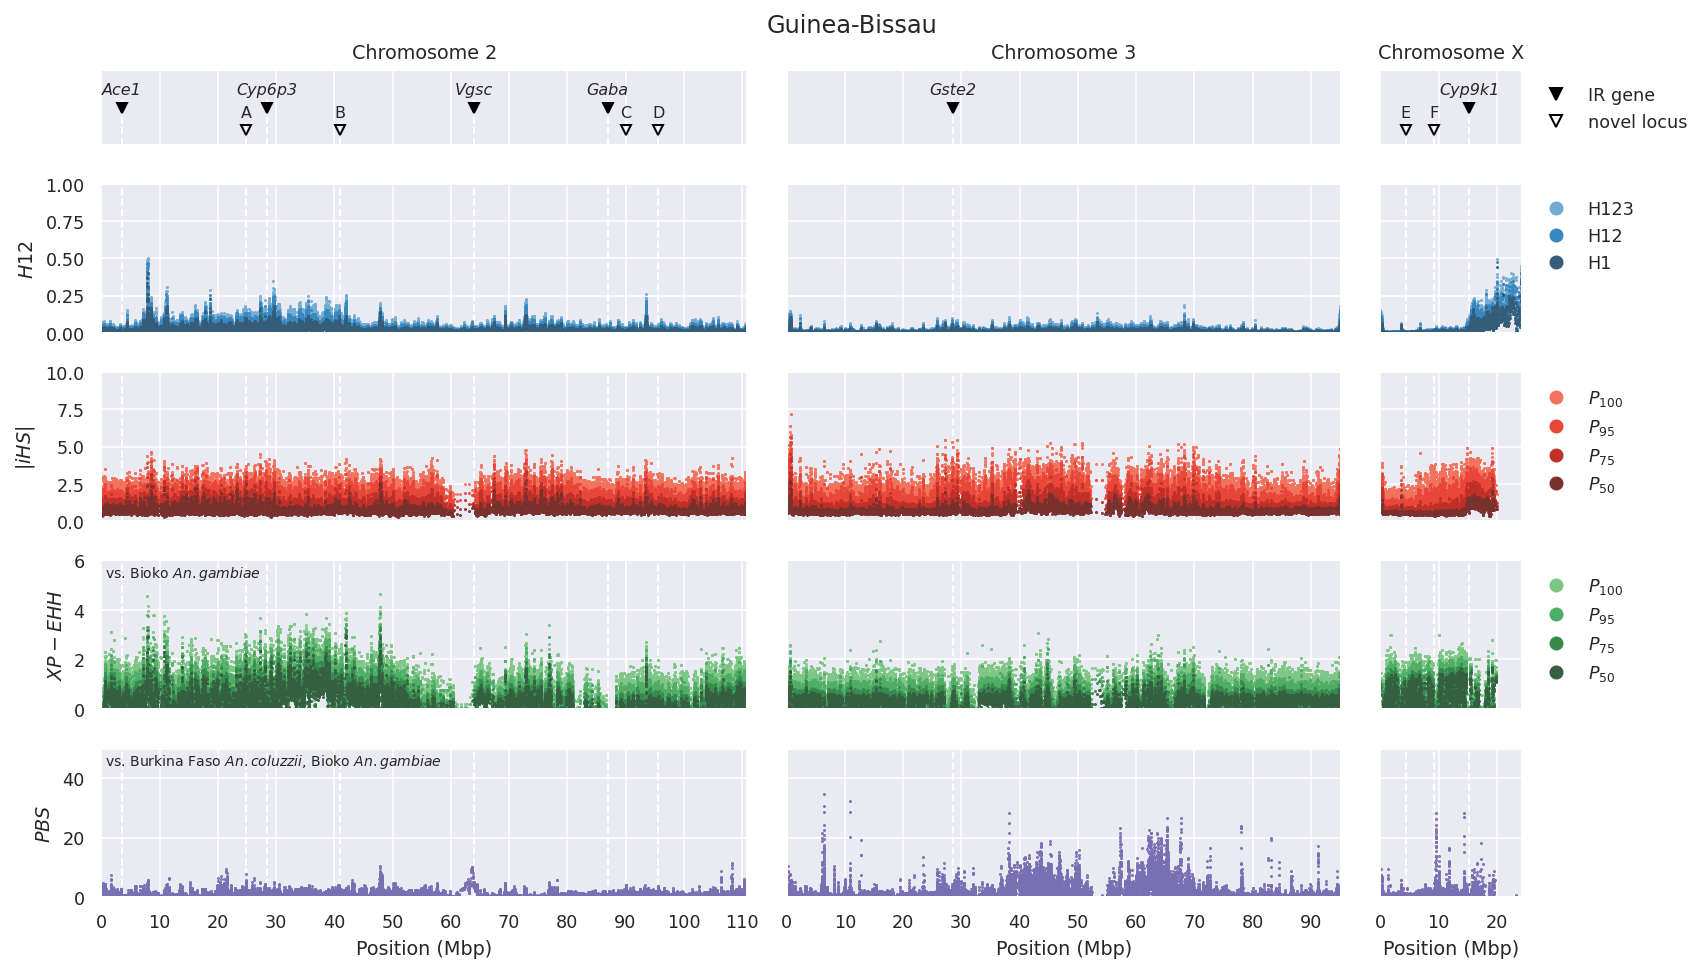

In [32]:
fig_gwss('gw', xpehh_pop='gq_gam', pbs_pops=('bf_col', 'gq_gam'))

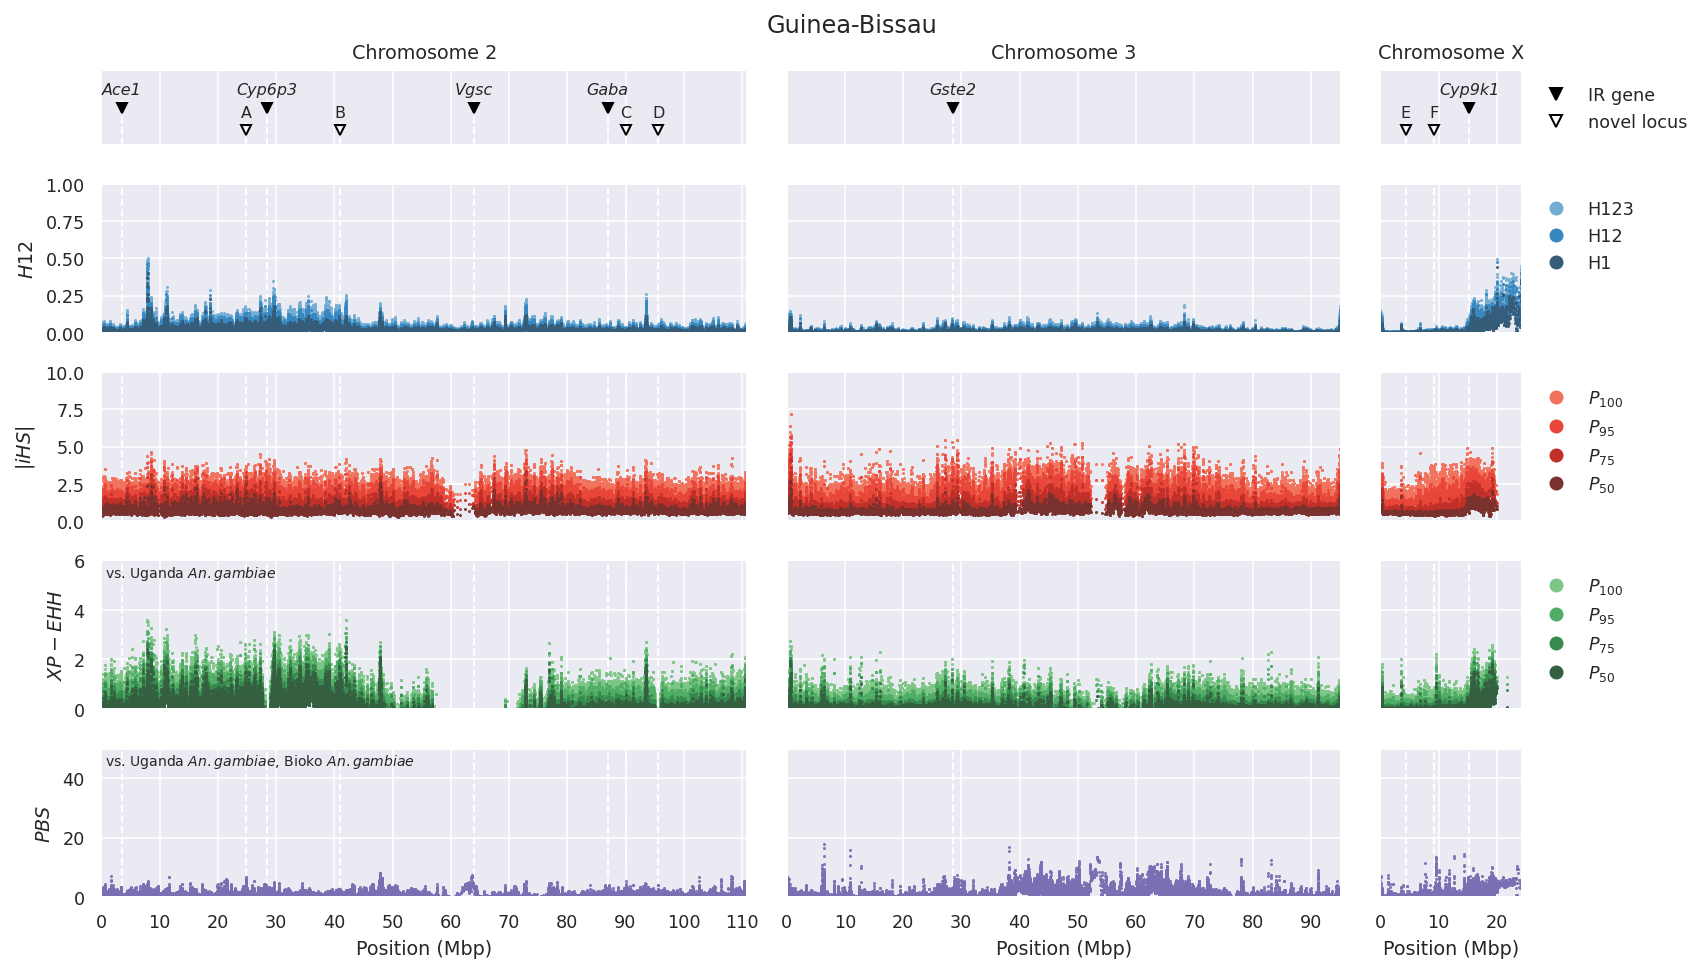

In [33]:
fig_gwss('gw', xpehh_pop='ug_gam', pbs_pops=('ug_gam', 'gq_gam'))

In [34]:
list(pop_defs), [x for x in xpehh_root if x.startswith('gm')], [x for x in pbs_root if x.startswith('gm')]

(['ao_col',
  'bf_col',
  'bf_gam',
  'ci_col',
  'cm_sav_gam',
  'fr_gam',
  'ga_gam',
  'gh_col',
  'gh_gam',
  'gm',
  'gn_gam',
  'gq_gam',
  'gw',
  'ke',
  'ug_gam'],
 ['gm_gq_gam'],
 ['gm_bf_col_gq_gam', 'gm_bf_gam_gq_gam', 'gm_gw_gq_gam', 'gm_ug_gam_gq_gam'])

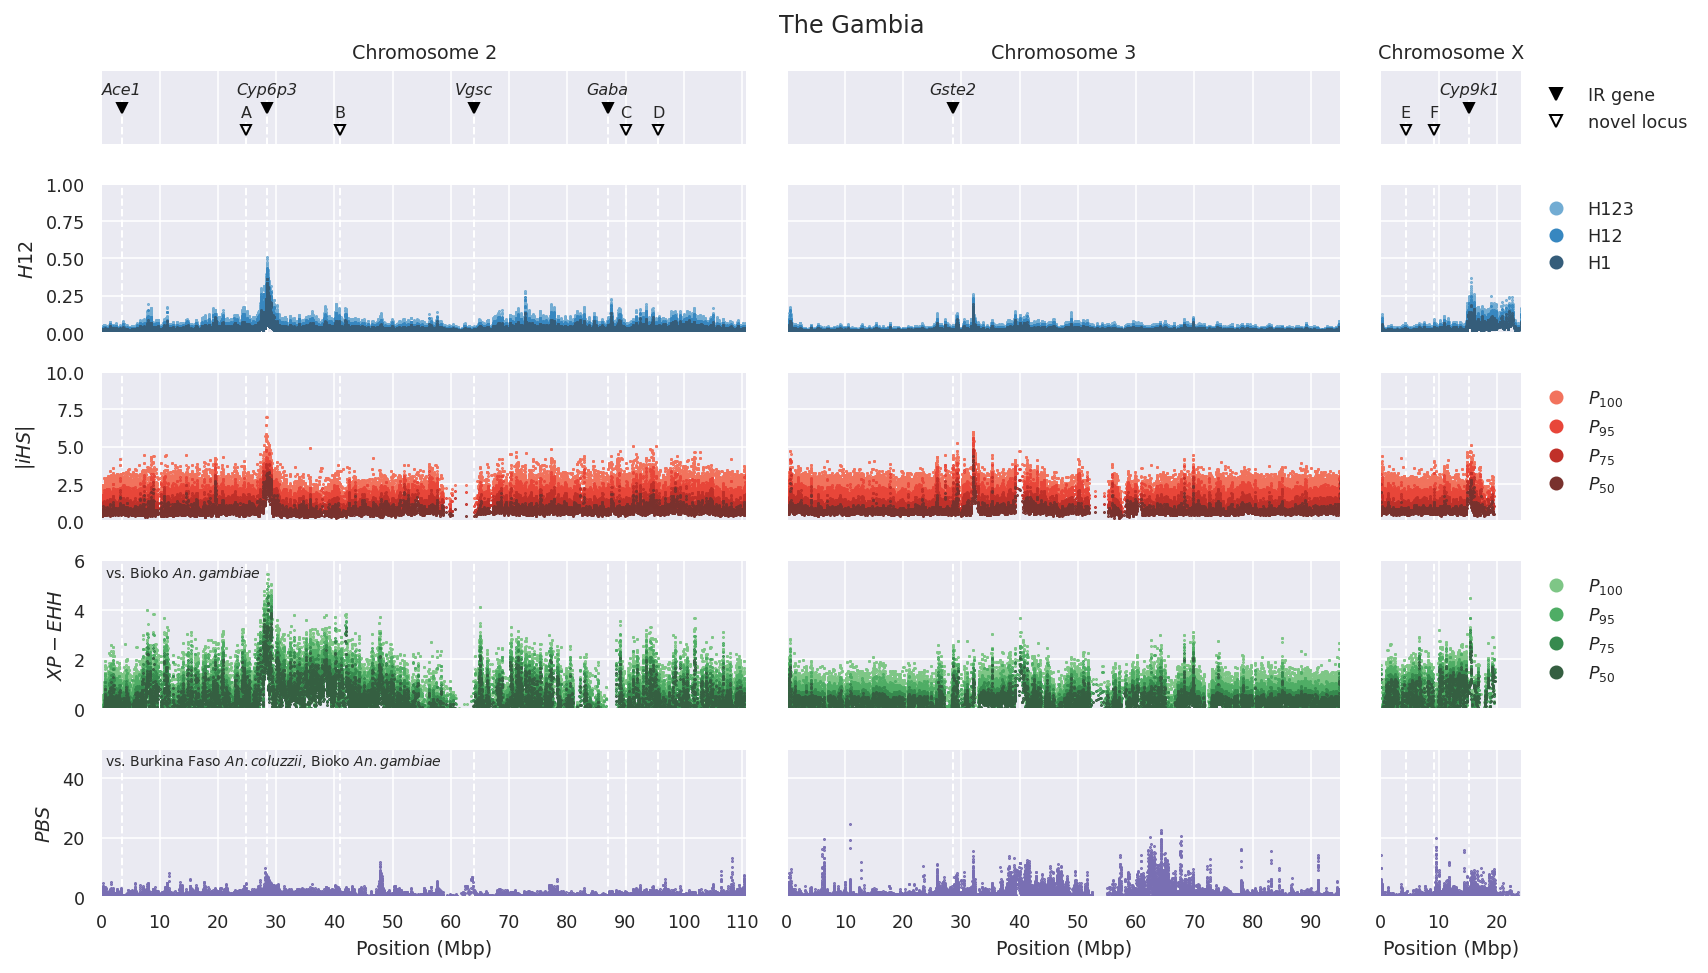

In [35]:
fig_gwss('gm', xpehh_pop='gq_gam', pbs_pops=('bf_col', 'gq_gam'))